In [1]:
import pandas as pd
import seaborn as sns
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.utils import get_column_letter
from openpyxl.worksheet.table import Table, TableStyleInfo
from openpyxl.styles import PatternFill

In [2]:
# Read in the data 
contestants = pd.read_excel('data/contestants.xlsx')

In [3]:
contestants.head()

,EMAIL,COHORT,PRE,POST,AGE,SEX,EDUCATION,SATISFACTION,STUDY_HOURS
0,smehaffey0@creativecommons.org,4,485,494,32.0,Male,Bachelor's,2,36.6
1,dbateman1@hao12@.com,4,462,458,33.0,Female,Bachelor's,8,22.4
2,bbenham2@xrea.com,3,477,483,NaN,Female,Bachelor's,1,19.8
3,mwison@@g.co,2,480,488,31.0,Female,Bachelor's,10,33.1
4,jagostini4@wordpress.org,1,495,494,38.0,Female,NaN,9,32.5


In [4]:
# Convert headers to all lowercase
contestants.columns = contestants.columns.str.lower()
contestants.head()

,email,cohort,pre,post,age,sex,education,satisfaction,study_hours
0,smehaffey0@creativecommons.org,4,485,494,32.0,Male,Bachelor's,2,36.6
1,dbateman1@hao12@.com,4,462,458,33.0,Female,Bachelor's,8,22.4
2,bbenham2@xrea.com,3,477,483,NaN,Female,Bachelor's,1,19.8
3,mwison@@g.co,2,480,488,31.0,Female,Bachelor's,10,33.1
4,jagostini4@wordpress.org,1,495,494,38.0,Female,NaN,9,32.5


In [5]:
# Define a regular expression pattern for valid email addresses
email_pattern = r'^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}$'  

In [6]:
full_emails = contestants[contestants['email'].str.contains(email_pattern)]

In [7]:
# Dimensions of original DataFrame
contestants.shape

(100, 9)

In [8]:
# Dimensions of DataFrame with valid emails
full_emails.shape

(82, 9)

In [9]:
full_emails.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   email         82 non-null     object 
 1   cohort        82 non-null     int64  
 2   pre           82 non-null     int64  
 3   post          82 non-null     int64  
 4   age           81 non-null     float64
 5   sex           82 non-null     object 
 6   education     81 non-null     object 
 7   satisfaction  82 non-null     int64  
 8   study_hours   82 non-null     float64
dtypes: float64(2), int64(4), object(3)
memory usage: 6.4+ KB


In [10]:
full_emails.isna().mean().sort_values(ascending=False)

age             0.012195
education       0.012195
email           0.000000
cohort          0.000000
pre             0.000000
post            0.000000
sex             0.000000
satisfaction    0.000000
study_hours     0.000000
dtype: float64

In [11]:
complete_cases = full_emails.dropna()

In [12]:
complete_cases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   email         80 non-null     object 
 1   cohort        80 non-null     int64  
 2   pre           80 non-null     int64  
 3   post          80 non-null     int64  
 4   age           80 non-null     float64
 5   sex           80 non-null     object 
 6   education     80 non-null     object 
 7   satisfaction  80 non-null     int64  
 8   study_hours   80 non-null     float64
dtypes: float64(2), int64(4), object(3)
memory usage: 6.2+ KB


In [13]:
complete_cases['post_pct'] = complete_cases['post'].rank(pct=True)
complete_cases['post_pct'].describe()

C:\Users\GeorgeMount\AppData\Local\Temp\ipykernel_40632\2866818265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_cases['post_pct'] = complete_cases['post'].rank(pct=True)


count    80.000000
mean      0.506250
std       0.290375
min       0.012500
25%       0.264062
50%       0.506250
75%       0.756250
max       1.000000
Name: post_pct, dtype: float64

In [14]:
complete_cases.describe()

,cohort,pre,post,age,satisfaction,study_hours,post_pct
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,2.475000,480.550000,480.987500,30.162500,5.237500,28.316250,0.506250
std,1.147093,20.752856,23.181995,6.042976,2.869498,5.228245,0.290375
min,1.000000,409.000000,398.000000,20.000000,1.000000,14.500000,0.012500
25%,1.000000,470.000000,466.500000,25.000000,3.000000,25.950000,0.264062
50%,2.500000,484.000000,483.000000,30.500000,5.000000,28.050000,0.506250
75%,3.250000,494.000000,497.000000,35.000000,7.000000,32.225000,0.756250
max,4.000000,521.000000,540.000000,40.000000,10.000000,40.900000,1.000000


In [15]:
# Create a new workbook and select the worksheet
wb = Workbook()

# Assign the active worksheet to ws
ws = wb.active

In [16]:
ws['A1'] = "Average pre score"
ws['B1'] = round(complete_cases['pre'].mean(), 2)  # Round output to two decimals

ws['A2'] = "Average post score"
ws['B2'] = round(complete_cases['post'].mean(), 2)

In [17]:
ws.column_dimensions['A'].width = 16

In [18]:
# Create a bar chart object
chart = BarChart()

# Define the data range
data = Reference(ws, min_col=2, min_row=1, max_col=2, max_row=2)

In [19]:
# Add data to the chart
chart.add_data(data)

# Set chart title, axis labels
chart.title = "Score Comparison"
chart.x_axis.title = "Score Type"
chart.y_axis.title = "Score Value"

In [20]:
# Set category names
categories = Reference(ws, min_col=1, min_row=1, max_row=2)
chart.set_categories(categories)

# Remove the legend
chart.legend = None

In [21]:
# Add the chart to a specific location on the worksheet
ws.add_chart(chart, "D1")

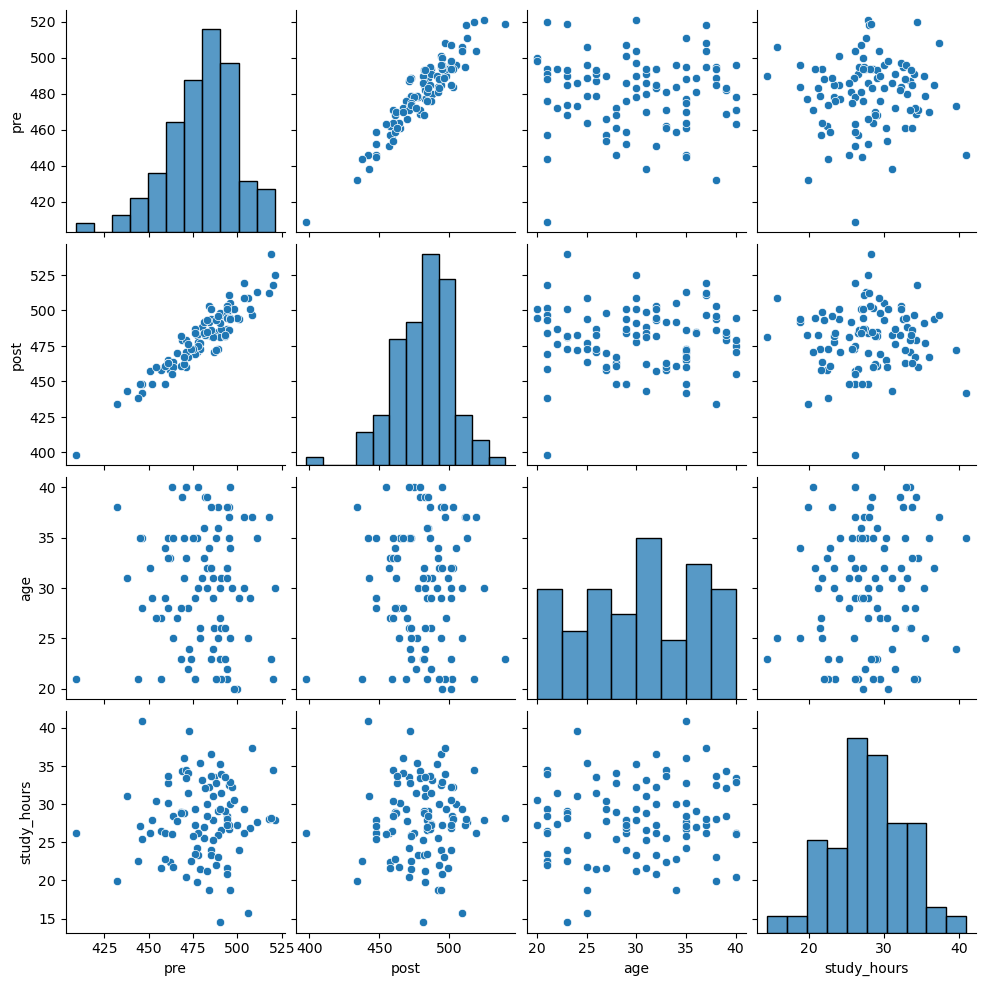

In [22]:
sns.pairplot(contestants[['pre', 'post', 'age', 'study_hours']])

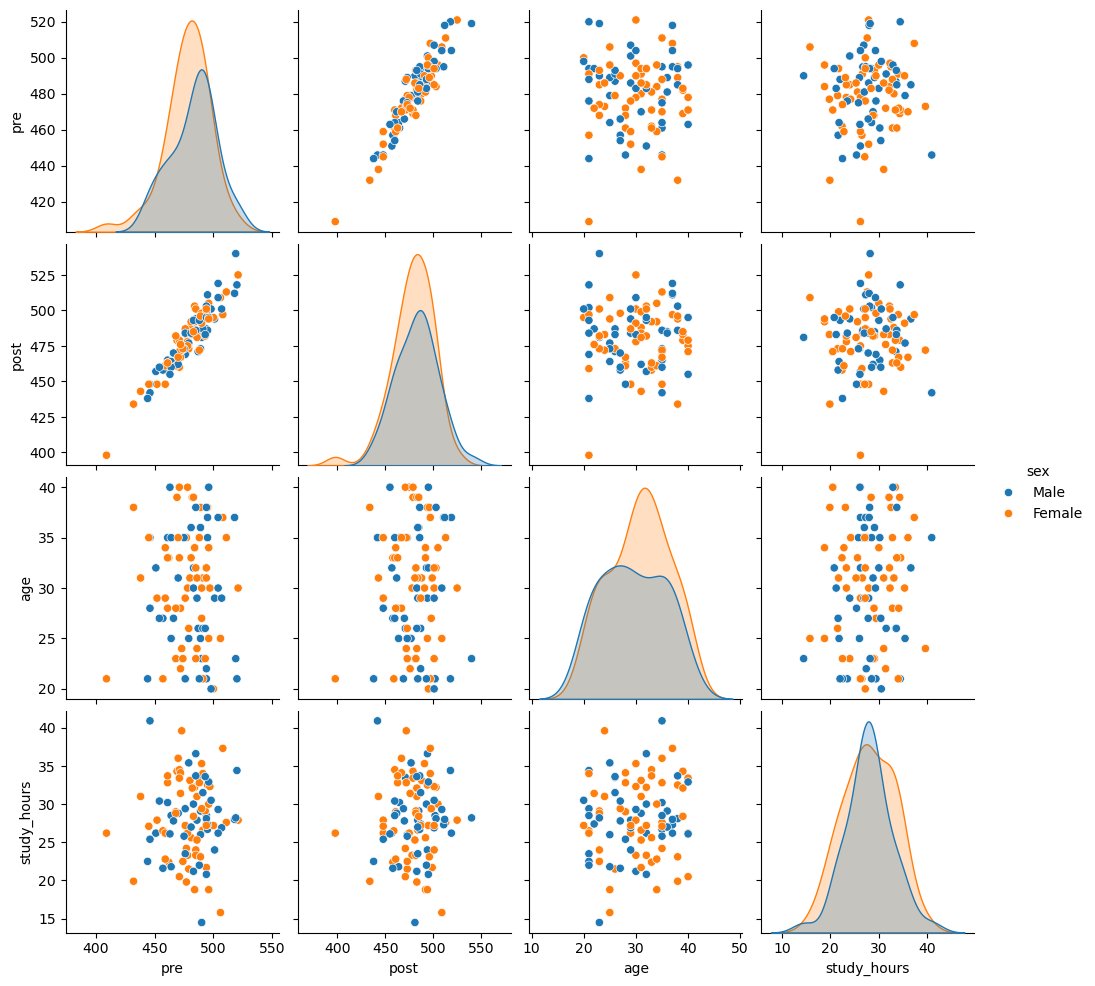

In [23]:
sns_plot = sns.pairplot(contestants[['pre', 'post', 'age', 'study_hours', 'sex']],
            hue='sex')

In [24]:
# Save pairplot to disk as an image
sns_plot.savefig('output/pairplot.png')

# Load saved image into the worksheet
image = Image('output/pairplot.png')
ws.add_image(image, 'A20')

In [25]:
ws2 = wb.create_sheet(title='data')

In [26]:
for row in dataframe_to_rows(complete_cases, index=False, header=True):
    ws2.append(row)

In [27]:
post_pct_loc = complete_cases.columns.get_loc('post_pct') + 1
post_pct_col = get_column_letter(post_pct_loc) 
post_pct_col

'J'

In [28]:
number_format = '0.0%'

for cell in ws2[post_pct_col]:
    cell.number_format = number_format

In [29]:
# Specify desired table formatting
style = TableStyleInfo(name='TableStyleMedium9', showRowStripes=True)

# Name and identify range of table
table = Table(displayName='contestants', 
              ref='A1:' + get_column_letter(ws2.max_column) + str(ws2.max_row))
              
# Apply styling and insert in worksheet 
table.tableStyleInfo = style
ws2.add_table(table)

In [30]:
# Define conditional formatting style
green_fill = PatternFill(start_color="B9E8A2", end_color="B9E8A2", fill_type="solid")
yellow_fill = PatternFill(start_color="FFF9D4", end_color="FFF9D4", fill_type="solid")

# Loop through data table and conditonally apply formatting
for row in ws2.iter_rows(min_row=2, min_col=1, max_col=len(complete_cases.columns)):
    post_pct = row[post_pct_loc - 1].value # Convert index to 0-based indexing
    if post_pct > .9:
        for cell in row:
            cell.fill = green_fill
    elif post_pct > .7:
        for cell in row:
            cell.fill = yellow_fill

In [31]:
for column in ws2.columns:
    max_length = 0
    column_letter = column[0].column_letter
    for cell in column:
        try:
            if len(str(cell.value)) > max_length:
                max_length = len(cell.value)
        except:
            pass
    adjusted_width = (max_length + 2) * 1.2
    ws2.column_dimensions[column_letter].width = adjusted_width

In [32]:
wb.save('output/ch_12_output.xlsx')